<a href="https://colab.research.google.com/github/vangarimahantesh/Data-analysis-python/blob/main/PROJECT_(DA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

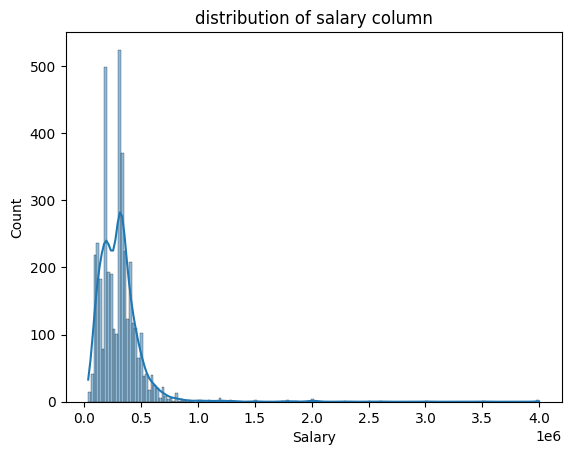

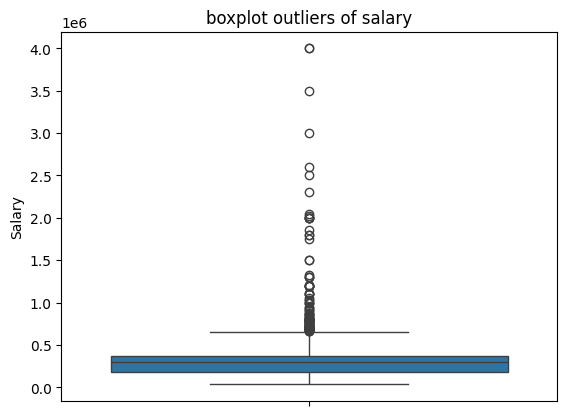

1st quantile : 180000.0
2nd quantile : 370000.0
IQR VALUE : 190000.0
lower bound value : -105000.0
upper bound value : 655000.0
(3998, 38)


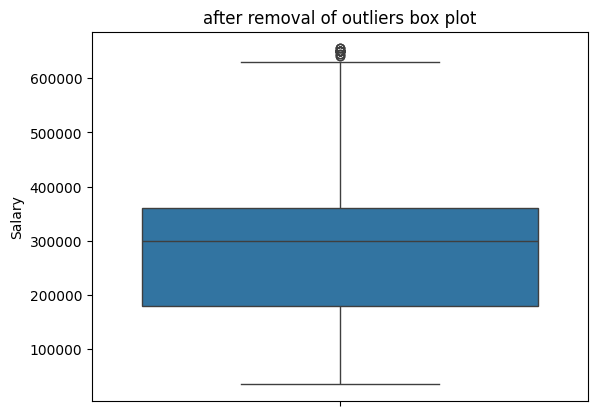

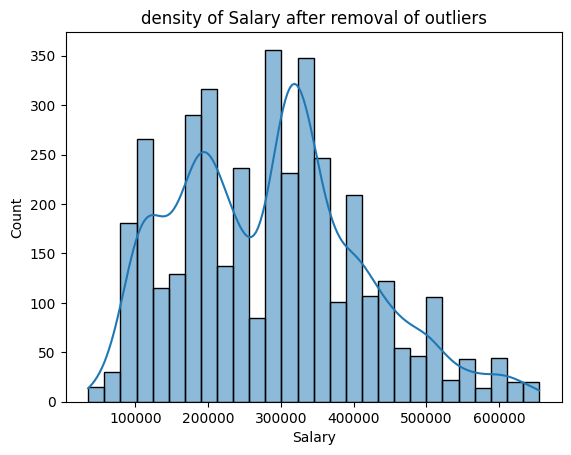

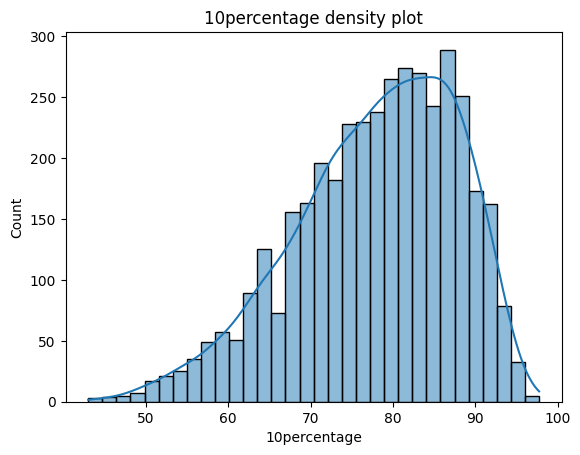

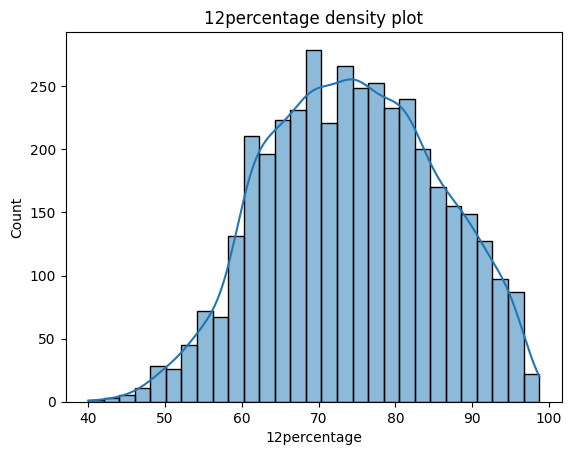

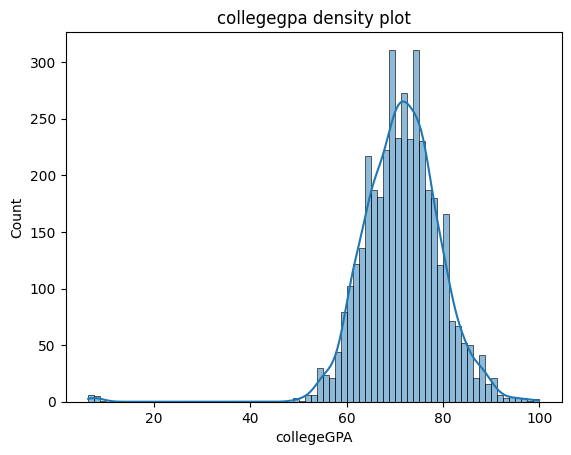

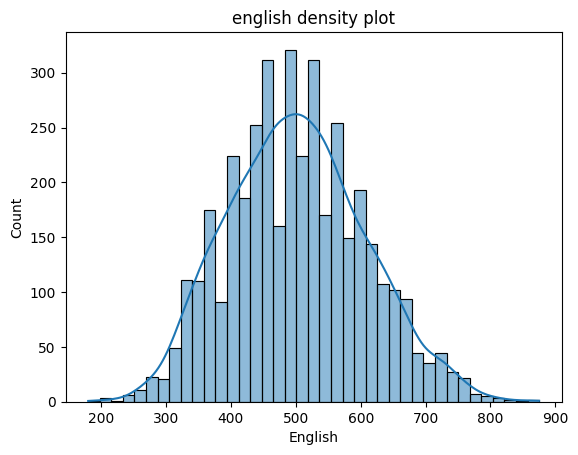

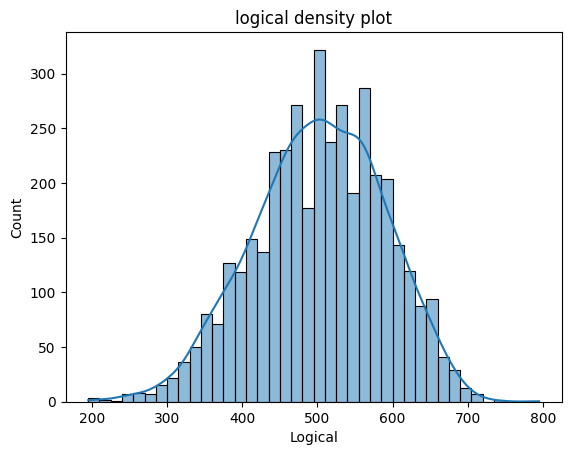

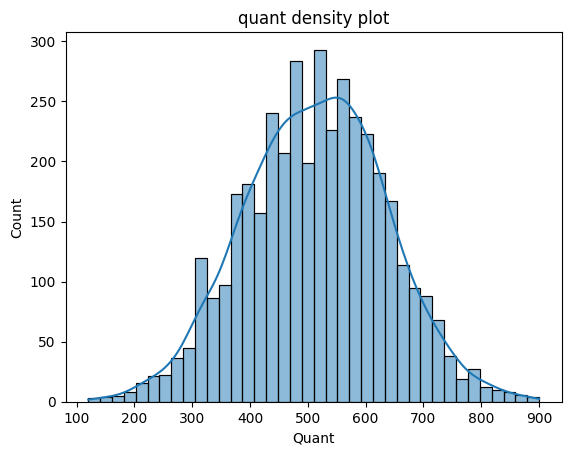

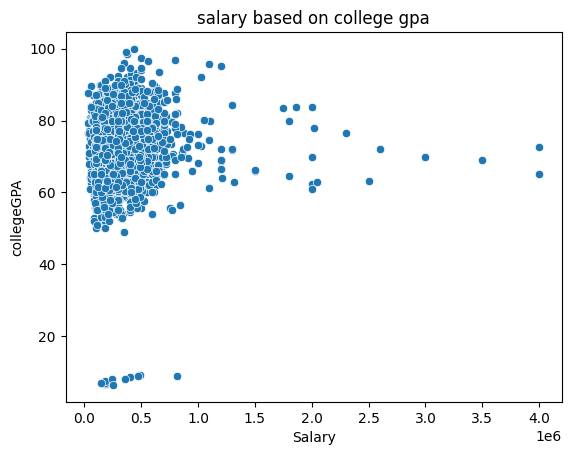

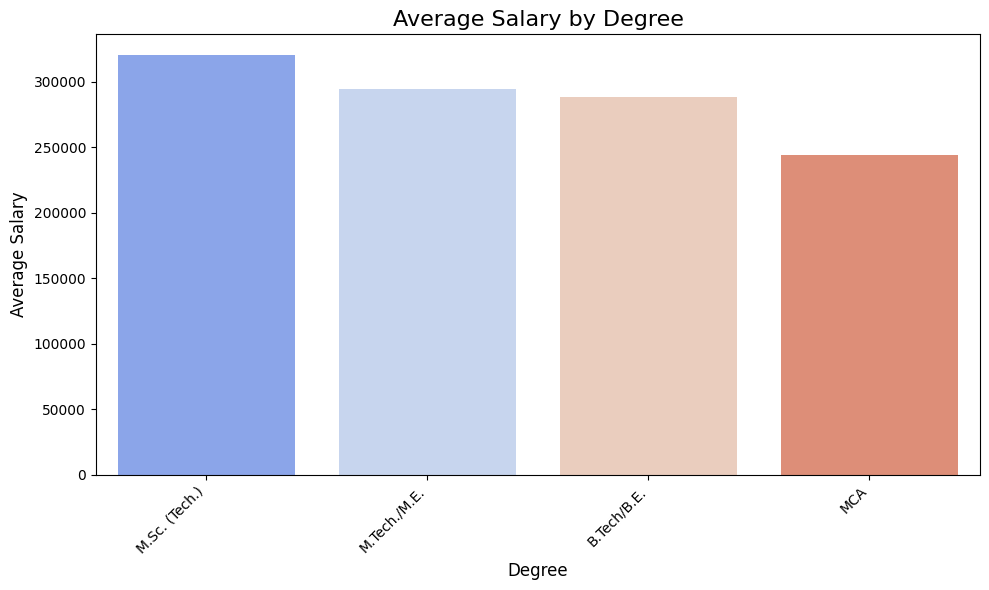

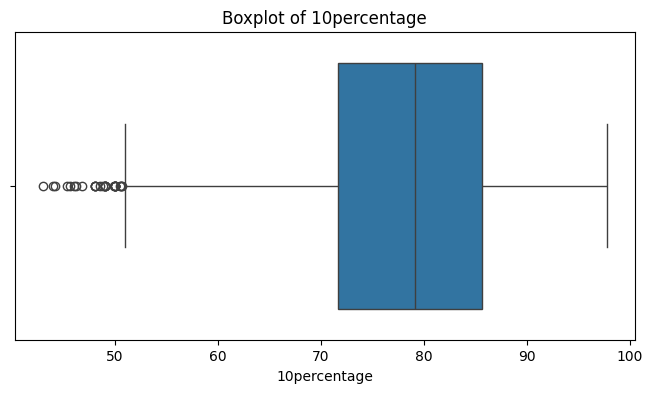

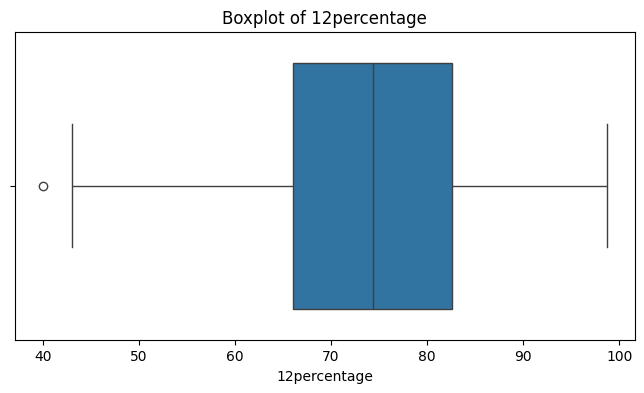

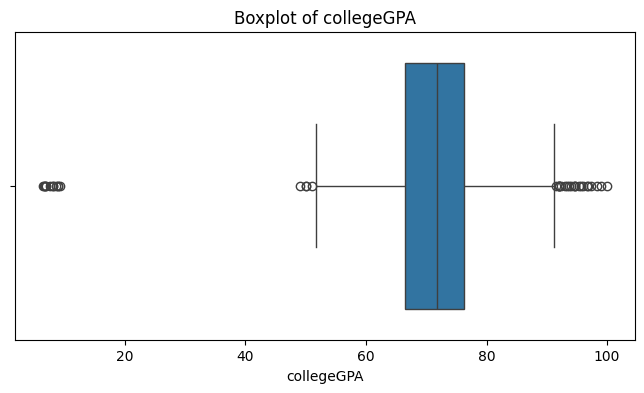

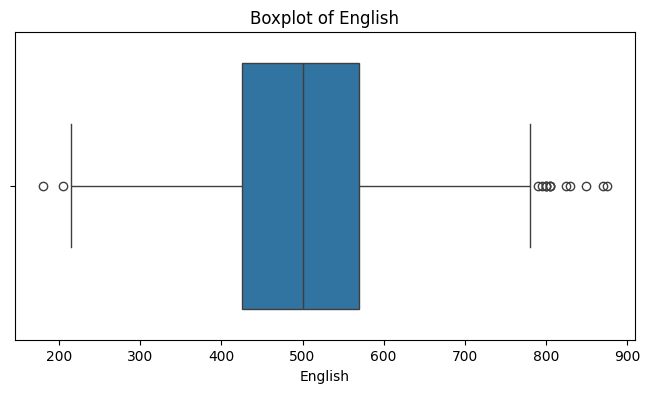

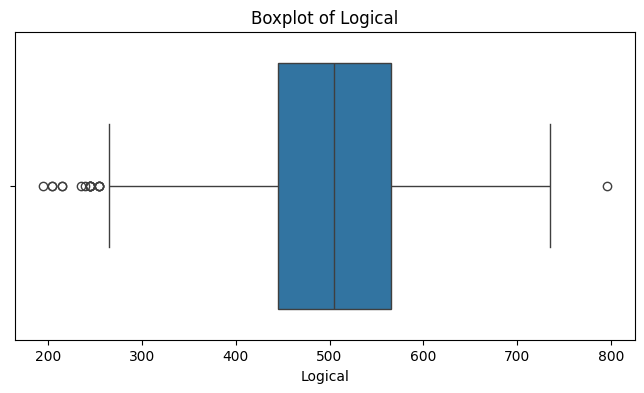

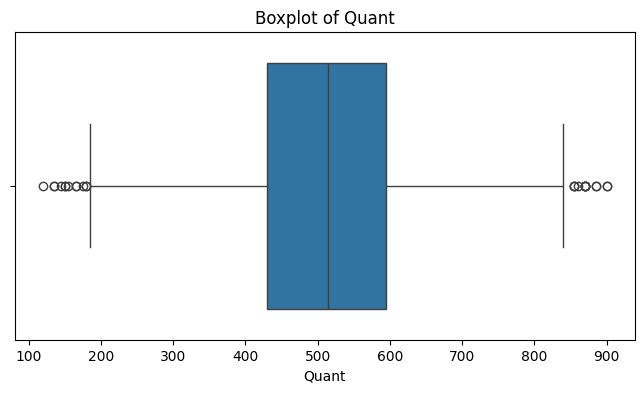

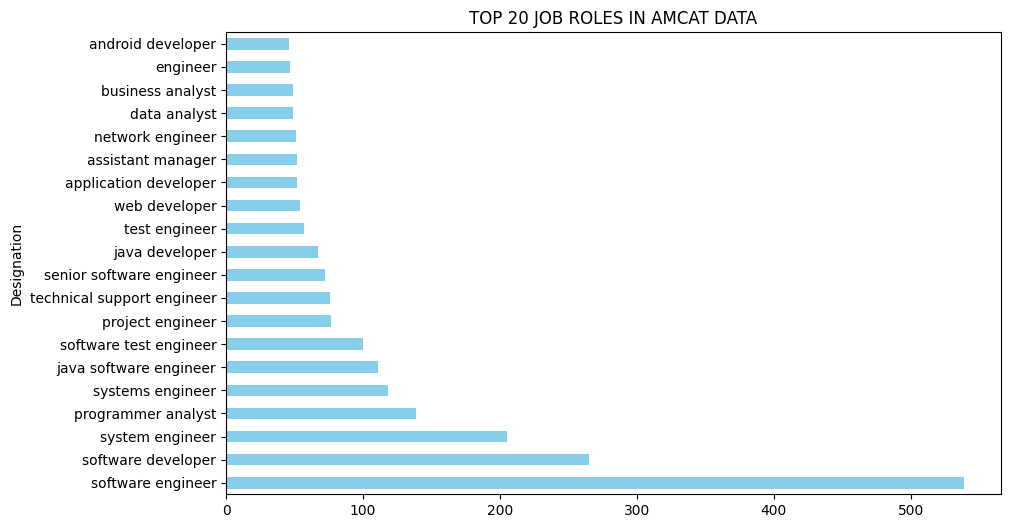

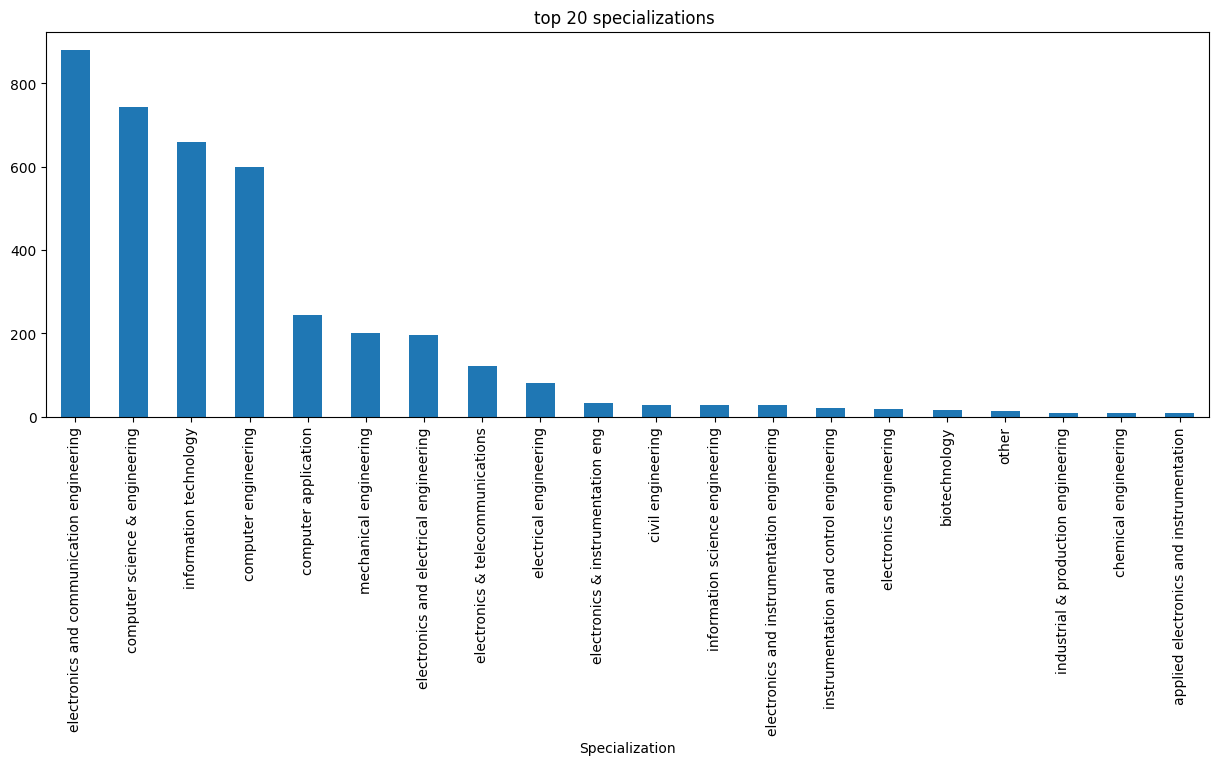

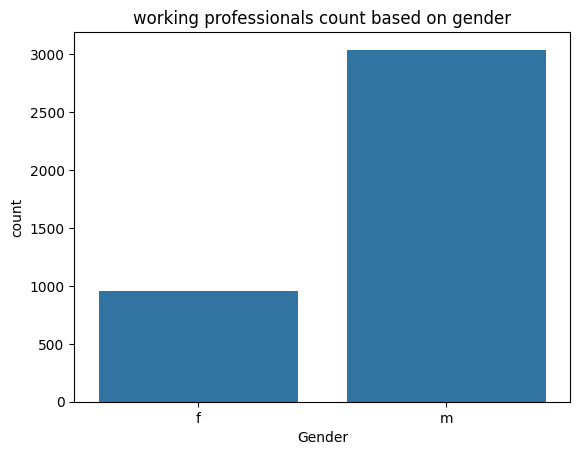

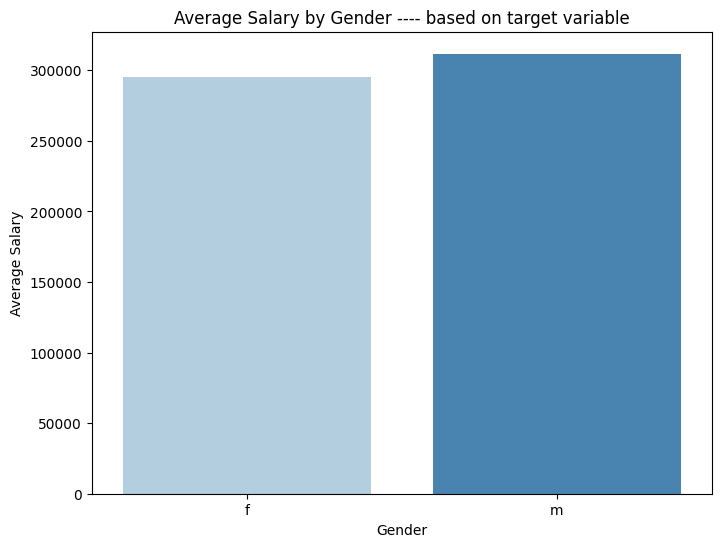

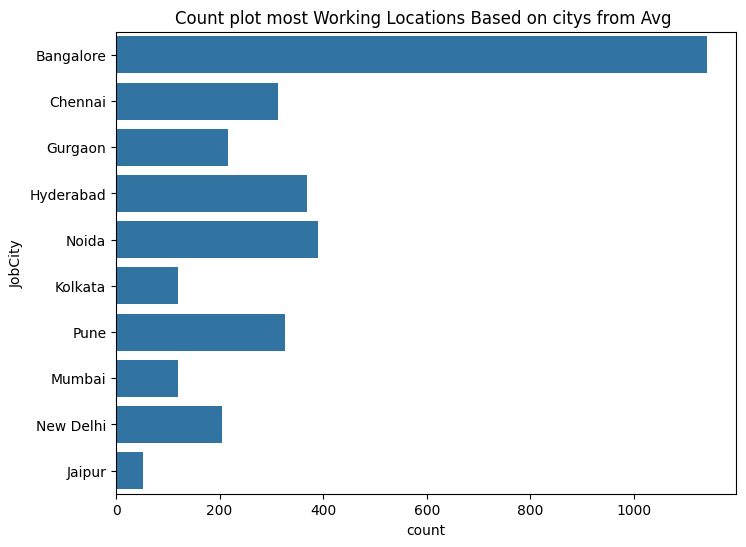

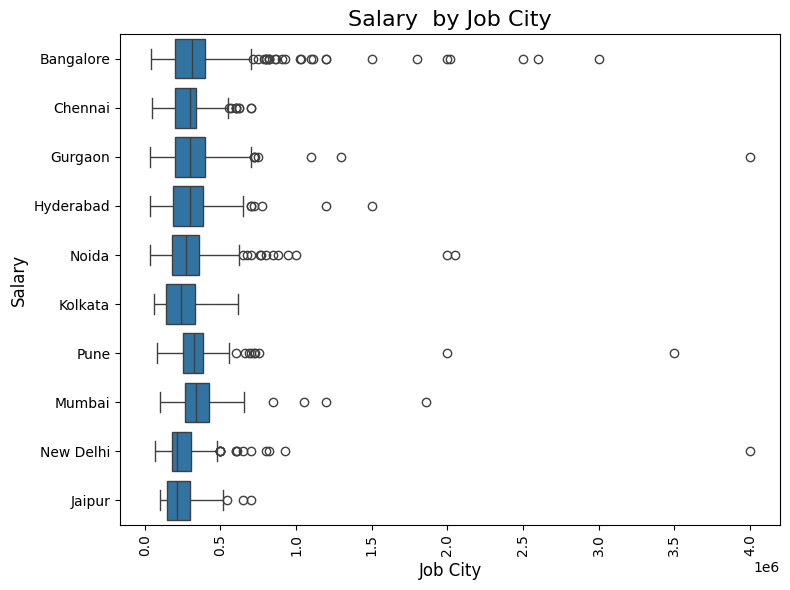

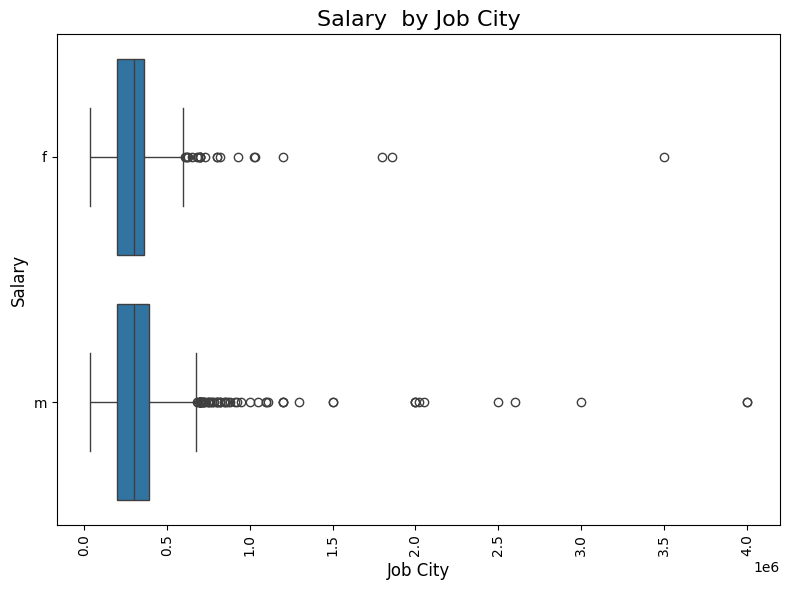

Axes(0.125,0.11;0.775x0.77)


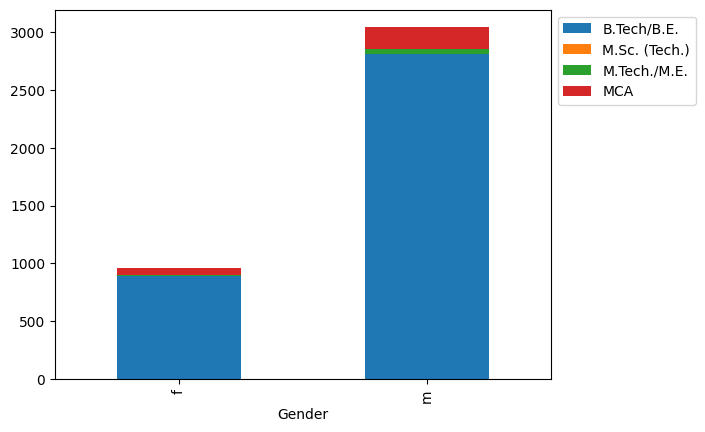

Axes(0.125,0.11;0.775x0.77)


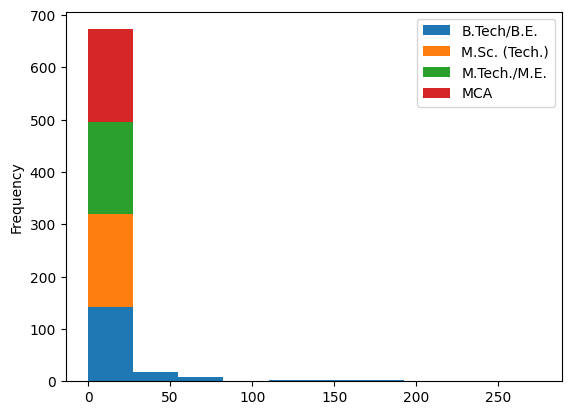

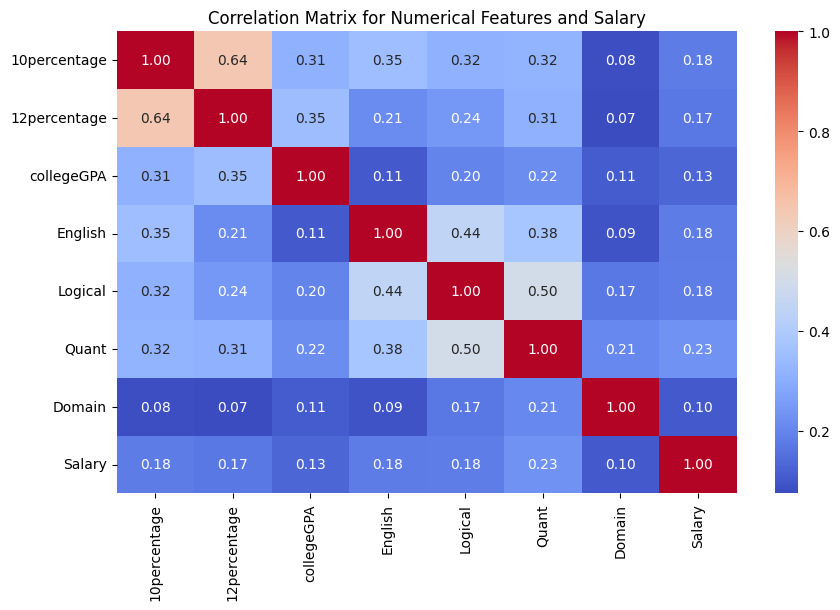

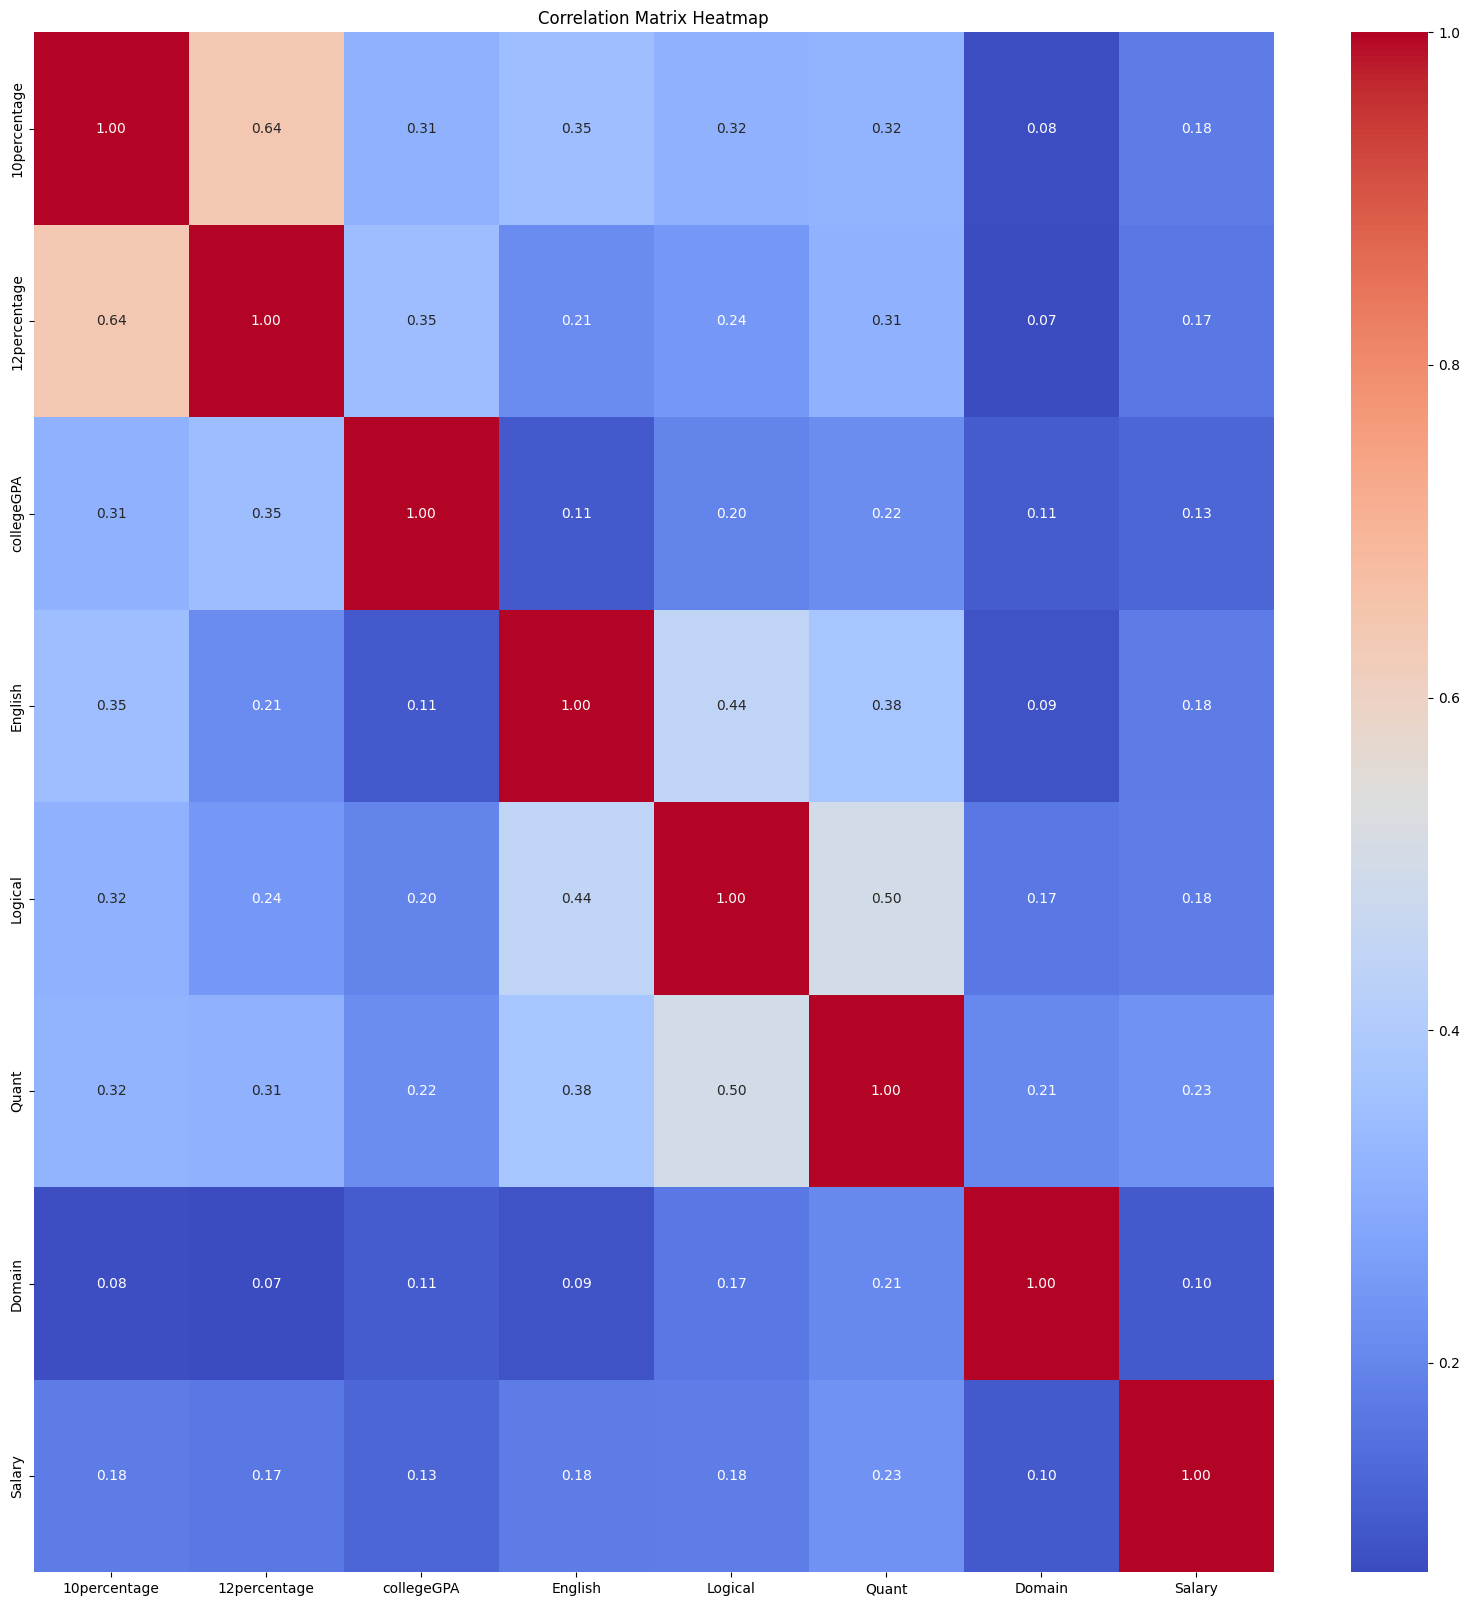

Index(['Salary', 'JobCity', 'Gender'], dtype='object')
Average salary: 315360.1108033241
The claim by the Times of India article is not valid.
Gender Counts:
Gender
m    2442
f     807
Name: count, dtype: int64
Column names in the DataFrame:
Index(['Salary', 'JobCity', 'Gender'], dtype='object')

Data types of the columns:
Salary     float64
JobCity     object
Gender      object
dtype: object

Preview of the DataFrame:
      Salary    JobCity Gender
0   420000.0  Bangalore      f
2   325000.0    Chennai      f
3  1100000.0    Gurgaon      m
5   300000.0  Hyderabad      m
6   300000.0  Bangalore      m

Missing values in each column:
Salary     0
JobCity    0
Gender     0
dtype: int64


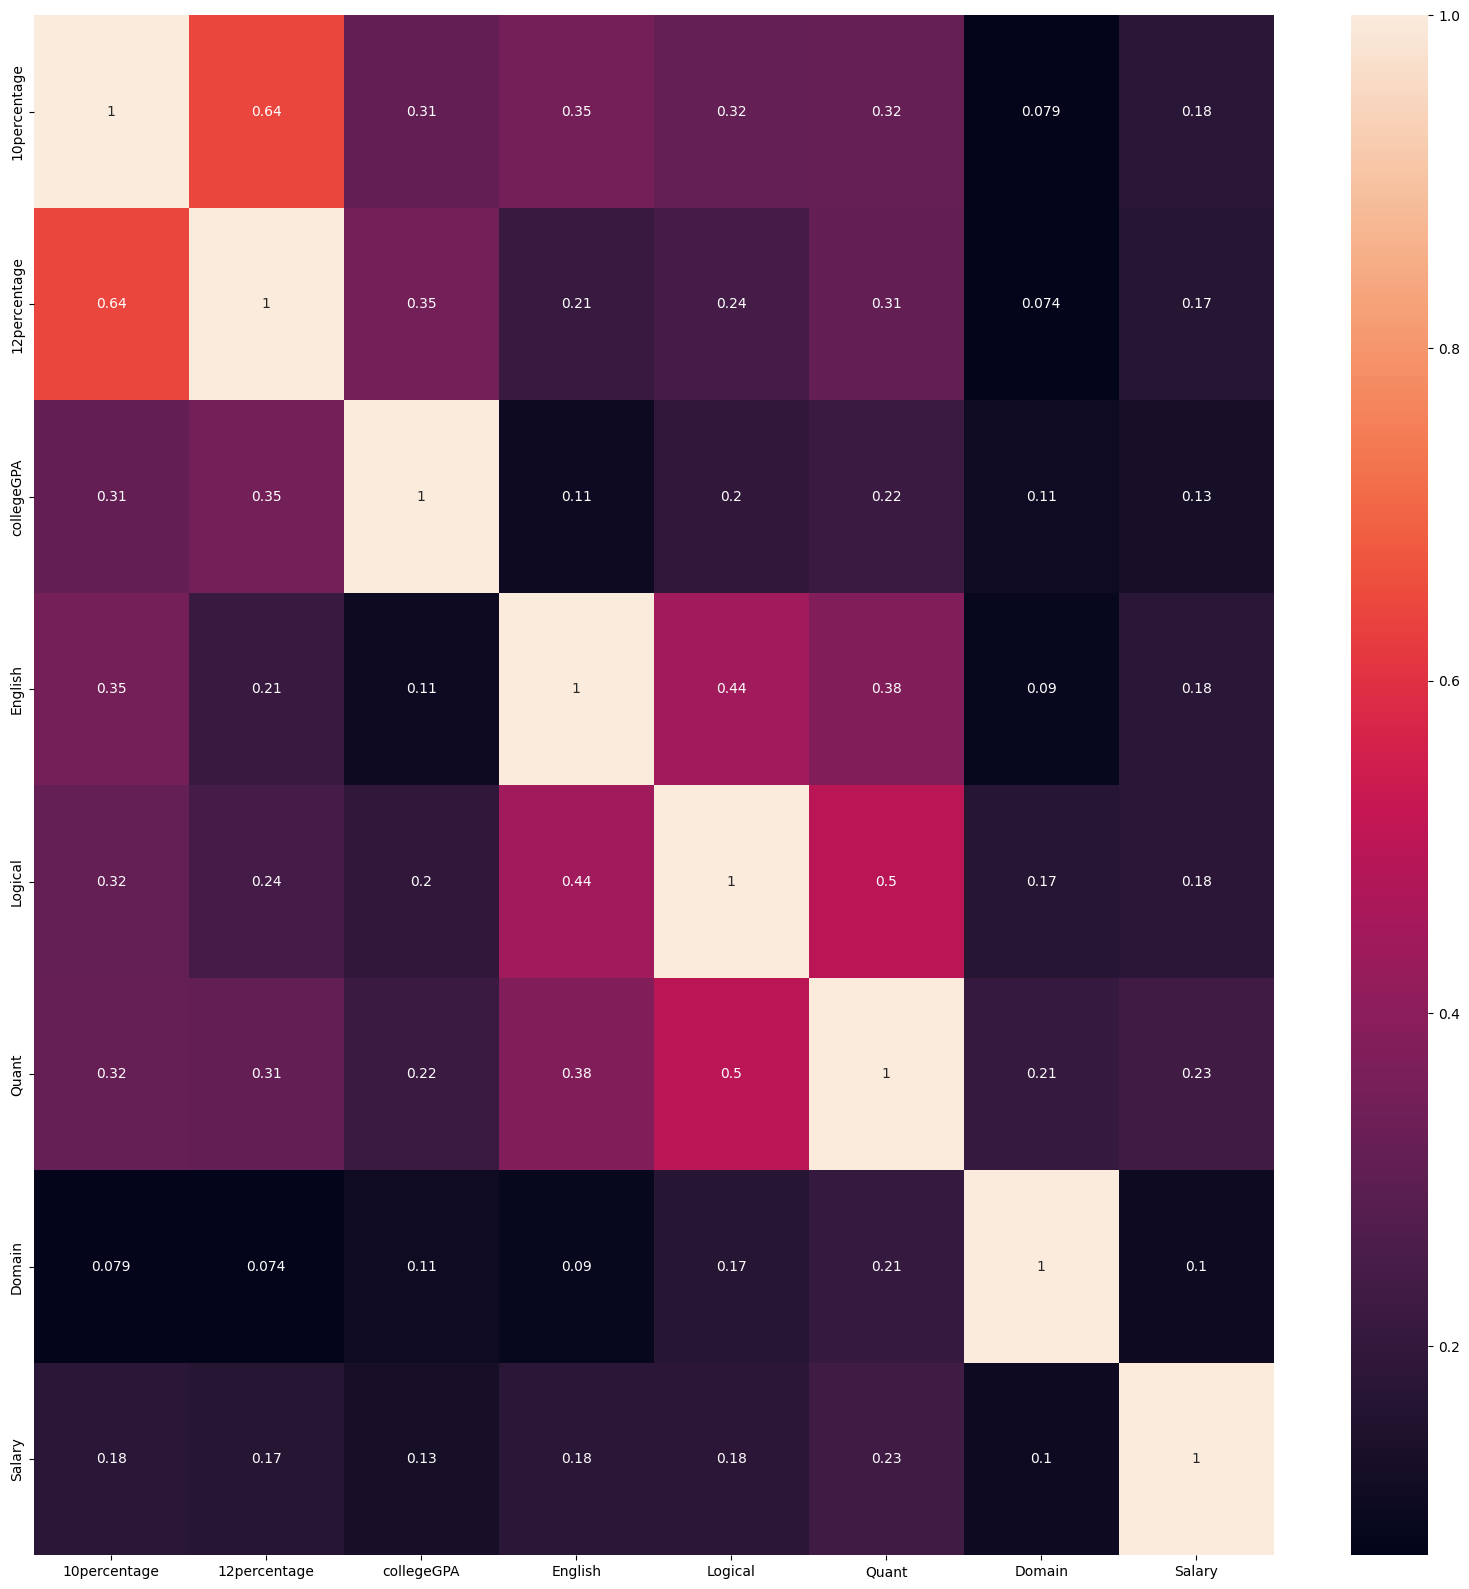

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"/content/data.xlsx - Sheet1 (1).csv")
data
data.drop('Unnamed: 0', axis = 1 , inplace =True)
data.head()
data.columns
data.info()
data.isna().sum()
data.duplicated().value_counts()
data.shape
data["DOJ"] = pd.to_datetime(data['DOJ'])
data['DOB'] = pd.to_datetime(data['DOB'])
data['DOL']
data['DOL'] = (pd.to_datetime(data['DOL'].replace("present" , pd.to_datetime("today")))).dt.date
data['DOL']
sns.histplot(data['Salary'], kde=True)
plt.title('distribution of salary column')
plt.show()
sns.boxplot(data['Salary'])
plt.title('boxplot outliers of salary')
plt.show()
q1 = data['Salary'].quantile(0.25)
q3 = data['Salary'].quantile(0.75)
print("1st quantile :", q1)
print("2nd quantile :", q3)
IQR = q3 - q1
print("IQR VALUE :", IQR)

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
print("=======================================")
print("lower bound value :", lower_bound)
print("upper bound value :", upper_bound)

outliers = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)]
outliers.head()
print(data.shape)
df = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]
df
sns.boxplot(df['Salary'])
plt.title('after removal of outliers box plot')
plt.show()
sns.histplot(df['Salary'], kde=True)
plt.title('density of Salary after removal of outliers')
plt.show()
data_int = data.select_dtypes(['int64' , 'float64'])
data_int.head()
data.columns
sns.histplot(data_int["10percentage"], kde=True)
plt.title('10percentage density plot')
plt.show()
sns.histplot(data_int["12percentage"], kde=True)
plt.title('12percentage density plot')
plt.show()
sns.histplot(data_int["collegeGPA"], kde=True)
plt.title('collegegpa density plot')
plt.show()
sns.histplot(data_int["English"], kde=True)
plt.title('english density plot')
plt.show()
sns.histplot(data_int["Logical"], kde=True)
plt.title('logical density plot')
plt.show()
sns.histplot(data_int["Quant"], kde=True)
plt.title('quant density plot')
plt.show()
sns.scatterplot(x=data['Salary'], y=data['collegeGPA'])
plt.title("salary based on college gpa")
plt.show()
degree_salary = df.groupby('Degree')['Salary'].mean().reset_index()
degree_salary = degree_salary.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=degree_salary, palette='coolwarm')
plt.title('Average Salary by Degree', fontsize=16)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
numerical_features = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_int[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()
designation_counts = data['Designation'].value_counts()
top_20_designations = designation_counts.nlargest(20)
top_20_designations
plt.figure(figsize=(10, 6))
top_20_designations.plot(kind='barh', color='skyblue')
plt.title('TOP 20 JOB ROLES IN AMCAT DATA')
plt.show()
data.columns
data['Specialization'].value_counts().head(20)
specialization_freq = data['Specialization'].value_counts().head(20)
specialization_freq.plot(kind='bar', figsize=(15,5))
plt.title('top 20 specializations ')
plt.show()
bottom_10_designations = designation_counts.nsmallest(10)
bottom_10_designations
data['Gender'].value_counts()
sns.countplot(x=data['Gender'])
plt.title('working professionals count based on gender')
plt.show()
df = pd.DataFrame(data)

gender_salary = df.groupby('Gender')['Salary'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Salary', data=gender_salary, palette='Blues')
plt.title('Average Salary by Gender ---- based on target variable')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()
data['JobCity'].nunique()
data['JobCity'].unique()
df = data
df['JobCity'] = df['JobCity'].str.strip().str.title().replace({'Banglore': 'Bangalore','Bhubaneswar':'Bhubaneshwar'})
data = df
data['JobCity'].nunique()
data['JobCity'].unique()
mode_city  = data['JobCity'].mode()[0]
mode_city
data['JobCity'] = data['JobCity'].replace('-1', mode_city)
data.shape
data['JobCity'].unique()
city_counts = data['JobCity'].value_counts()
top_10_city = city_counts.nlargest(10)
top_10_city
df_filtered = df[df['JobCity'].isin(top_10_city.index)]
df_filtered.head()
df_filtered.shape
plt.figure(figsize=(8, 6))
sns.countplot(y = 'JobCity' , data = df_filtered , orient = 'h')
plt.title('Count plot most Working Locations Based on citys from Avg ')
plt.show()
df = df_filtered[['Salary' , 'JobCity' , 'Gender']]
plt.figure(figsize=(8, 6))
sns.boxplot(y='JobCity', x='Salary', data=df,)

# Customize the plot
plt.title('Salary  by Job City', fontsize=16)
plt.xlabel('Job City', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(y='Gender', x='Salary', data=df,)

# Customize the plot
plt.title('Salary  by Job City', fontsize=16)
plt.xlabel('Job City', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
data.columns
data['GraduationYear'].value_counts()
data['Degree'] = data['Degree'].str.strip()
crosstab_deg =pd.crosstab(data['Gender'],data['Degree'])
crosstab_deg
print(crosstab_deg.plot(kind='bar',stacked=True))
plt.legend(bbox_to_anchor=(1,1))
plt.show()
crosstab_deg =pd.crosstab(data['Salary'],data['Degree'])
crosstab_deg
print(crosstab_deg.plot(kind='hist',stacked=True))
plt.legend(bbox_to_anchor=(1,1))
plt.show()
df
data = df
numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'Salary']

# Use data_int for correlation matrix calculation
corr_matrix = data_int[numerical_cols].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features and Salary')
plt.show()
numerical_cols = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'Salary']

# Use data_int for this heatmap as well
df_for_heatmap = data_int[numerical_cols]


plt.figure(figsize=(20, 20))
sns.heatmap(df_for_heatmap.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.figure(figsize=(20,20))
sns.heatmap(df_for_heatmap.corr(),annot=True)
from scipy.stats import chi2_contingency
print(df.columns)
import pandas as pd

# Assuming 'data' is already defined and contains the necessary columns
df = pd.DataFrame(data)

# Calculate average salary for the existing dataset
average_salary = df['Salary'].mean()
print(f"Average salary: {average_salary}")

if 250000 <= average_salary <= 300000:
    print("The claim by the Times of India article is valid.")
else:
    print("The claim by the Times of India article is not valid.")

# Analyze gender counts
gender_counts = df['Gender'].value_counts()
print("Gender Counts:")
print(gender_counts)
import pandas as pd

# Assuming 'data' is your dataset, load it into a DataFrame
df = pd.DataFrame(data)

# Print the column names
print("Column names in the DataFrame:")
print(df.columns)

# Print the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Print the first few rows of the DataFrame to see its structure
print("\nPreview of the DataFrame:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())